In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
dataset = pd.read_csv("E:\machine learning\datasets\drug200.csv")
dataset.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [5]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Sex  Drug 
F    drugA     9
     drugB     6
     drugC     7
     drugX    27
     drugY    47
M    drugA    14
     drugB    10
     drugC     9
     drugX    27
     drugY    44
Name: Sex, dtype: int64


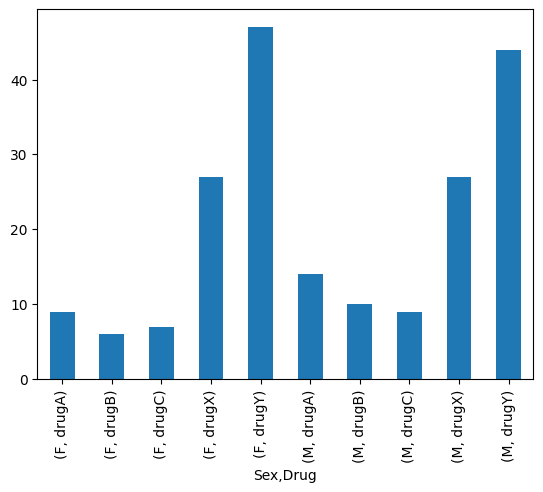

BP      Drug 
HIGH    drugA    23
        drugB    16
        drugY    38
LOW     drugC    16
        drugX    18
        drugY    30
NORMAL  drugX    36
        drugY    23
Name: BP, dtype: int64


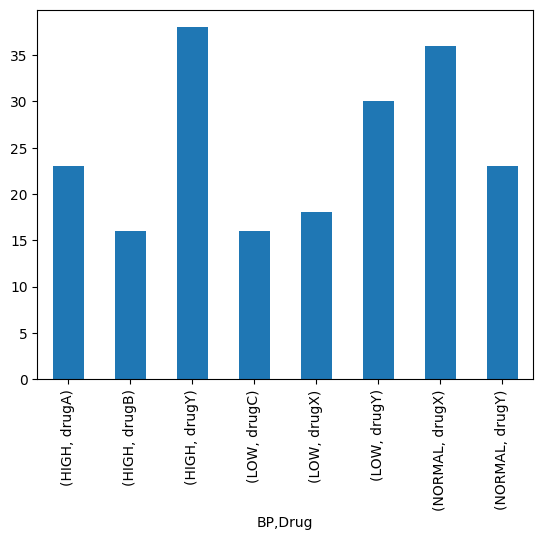

Cholesterol  Drug 
HIGH         drugA    12
             drugB     8
             drugC    16
             drugX    20
             drugY    47
NORMAL       drugA    11
             drugB     8
             drugX    34
             drugY    44
Name: Cholesterol, dtype: int64


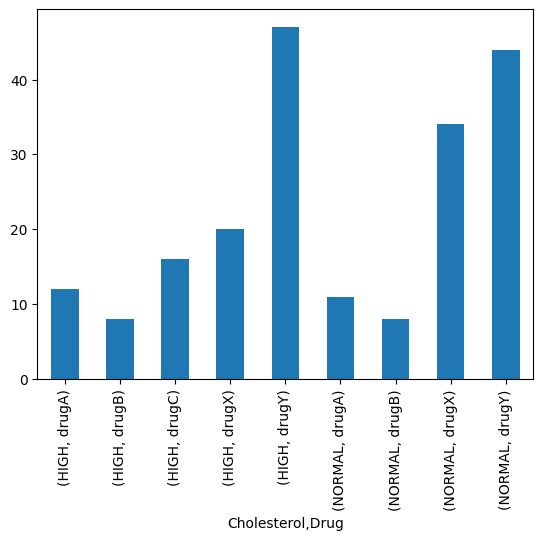

            17     36      46     61      66      76      78      83      100  \
Na_to_K  13.972  9.445  13.091  9.475  12.856  11.198  13.313  11.326  11.871   
Na_to_K     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN   
Na_to_K     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN   
Na_to_K     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN   
Na_to_K     NaN    NaN     NaN    NaN     NaN     NaN     NaN     NaN     NaN   

            101  ...     179     180    183     184     185     188     189  \
Na_to_K  12.854  ...     NaN     NaN    NaN     NaN     NaN     NaN     NaN   
Na_to_K     NaN  ...     NaN     NaN    NaN     NaN     NaN     NaN     NaN   
Na_to_K     NaN  ...     NaN     NaN    NaN     NaN     NaN     NaN     NaN   
Na_to_K     NaN  ...     NaN     NaN    NaN     NaN     NaN     NaN     NaN   
Na_to_K     NaN  ...  15.891  22.818  15.49  37.188  25.893  34.997  20.932   

            190    192     194  
Na_to

In [140]:
for i in ['Sex', 'BP', 'Cholesterol']:
    #cnt = dataset[i].groupby('Drug').nunique().count()
    cnt = dataset.groupby([i, 'Drug'])[i].count()
    print(cnt)
    #cnt.iloc[:,1].plot.bar()
    cnt.plot.bar()
    #print(np.max(cnt.columns.get_loc('Age')))
    #plt.bar(x=cnt.iloc[0, :], height=np.argmax(cnt.columns.get_loc('Age')))
    plt.show()
dataset.groupby('Drug')['Na_to_K'].count()

a = dataset.loc[dataset['Drug']=='drugA', 'Na_to_K']
b = dataset.loc[dataset['Drug']=='drugB', 'Na_to_K']
c = dataset.loc[dataset['Drug']=='drugC', 'Na_to_K']
x = dataset.loc[dataset['Drug']=='drugX', 'Na_to_K']
y = dataset.loc[dataset['Drug']=='drugY', 'Na_to_K']

drug_vs_Na = pd.DataFrame([a,b,c,x,y])#, columns=['drugA','drugB','drugC','drugX','drugY'])
print(drug_vs_Na)
# if dataset['Drug'].item == 'drugA':
#     print(dataset['Na_to_K'])